<a href="https://colab.research.google.com/github/tomassorrentino1/ecd2024b/blob/main/EDA%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd

# URL del archivo RAW en GitHub
url = "https://raw.githubusercontent.com/tomassorrentino1/ecd2024b/refs/heads/main/data/listings.csv"

# Cargar el dataset en un DataFrame
df = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,60390.0,3,42,2024-07-28,0.28,1,276,6,NaN
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,37001.0,7,120,2024-07-07,0.81,7,37,10,NaN
2,15074,ROOM WITH RIVER SIGHT,59338,Monica,NaN,Nuñez,-34.53892,-58.46599,Private room,NaN,29,0,NaN,NaN,1,0,0,NaN
3,96490,AMPLIA habitación individual en Buenos Aires,512049,Cristina,NaN,Palermo,-34.58503,-58.41206,Private room,8000.0,7,1,2023-01-15,0.05,2,352,0,NaN
4,16695,DUPLEX LOFT 2 - SAN TELMO,64880,Elbio Mariano,NaN,Monserrat,-34.61439,-58.37611,Entire home/apt,47275.0,2,45,2019-11-30,0.27,9,238,0,NaN


In [24]:


# Mostrar información general del DataFrame
print(df.info())

# Mostrar estadísticas descriptivas del DataFrame
print(df.describe())

# Mostrar los tipos de datos de cada columna
print(df.dtypes)

# Mostrar el número de filas y columnas
print(df.shape)

# Mostrar los nombres de las columnas
print(df.columns)

# Mostrar valores únicos de una columna específica (ejemplo: 'neighbourhood_group')
print(df['neighbourhood_group'].unique())

# Mostrar la cantidad de valores únicos por columna
print(df.nunique())

# Mostrar valores faltantes por columna
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36807 entries, 0 to 36806
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36807 non-null  int64  
 1   name                            36807 non-null  object 
 2   host_id                         36807 non-null  int64  
 3   host_name                       36807 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36807 non-null  object 
 6   latitude                        36807 non-null  float64
 7   longitude                       36807 non-null  float64
 8   room_type                       36807 non-null  object 
 9   price                           33851 non-null  float64
 10  minimum_nights                  36807 non-null  int64  
 11  number_of_reviews               36807 non-null  int64  
 12  last_review                     

In [25]:
# Mostrar valores faltantes por columna
# Al ver valores nulos en reviews_per_month, observamos los de reviews para ver si podiamos utilizar esos pero nos dimos cuenta que para los NaN de month, habian 0s en reviews. Asi que es lo mismo.
print(df.isnull().sum())

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group               36807
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              2956
minimum_nights                        0
number_of_reviews                     0
last_review                        6979
reviews_per_month                  6979
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           36380
dtype: int64


In [27]:
df_por_barrio = df.groupby('neighbourhood').size().sort_values(ascending=False)
df_por_barrio


,0
neighbourhood,
Palermo,11852
Recoleta,5365
San Nicolas,2344
Belgrano,1961
Monserrat,1753
Retiro,1691
Almagro,1377
Balvanera,1323
Villa Crespo,1261


In [28]:
df_host_id = df.groupby('host_id').size().sort_values(ascending=False)
df_host_id


,0
host_id,
11256892,235
1021694,206
55553719,179
3469227,179
278440549,150
...,...
105700623,1
105721408,1
105856469,1


In [29]:
# Crear una nueva columna con los rangos automáticos
df_price_range = pd.qcut(df['price'], q=4, labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])

# Mostrar el DataFrame con los rangos
df_price_range.value_counts()


,count
price,
Medio-Alto,9104
Bajo,8862
Medio-Bajo,8104
Alto,7781


In [30]:
# Aplicar pd.qcut para obtener los intervalos
intervalos = pd.qcut(df['price'], q=4)

# Mostrar las categorías (rangos) de los intervalos
rangos = intervalos.cat.categories
print(rangos)


IntervalIndex([   (259.999, 23638.0],    (23638.0, 32147.0],
                  (32147.0, 47275.0], (47275.0, 94550192.0]],
              dtype='interval[float64, right]')


In [31]:
import pandas as pd

# Asegúrate de que tu DataFrame se llama 'df'
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')  # Convertir a datetime
df['year_month'] = df['last_review'].dt.to_period('M')  # Crear columna año-mes

# Filtrar las reviews del año 2023
df_2023 = df[df['last_review'].dt.year == 2023]

# Contar cuántas reviews hubo por mes en 2023
reviews_2023_por_mes = df_2023['year_month'].value_counts().sort_index()

# Mostrar resultados
print(reviews_2023_por_mes)


year_month
2023-01     147
2023-02     104
2023-03     171
2023-04     227
2023-05     116
2023-06     110
2023-07     345
2023-08     171
2023-09     167
2023-10     226
2023-11    1156
2023-12     622
Freq: M, Name: count, dtype: int64


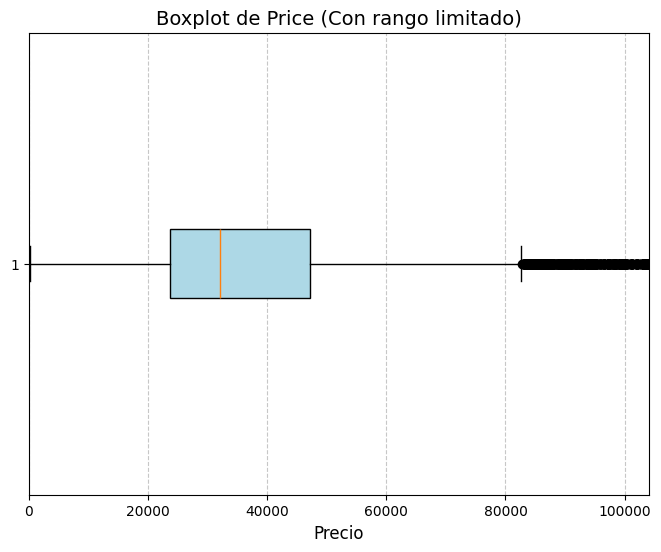

In [60]:

plt.figure(figsize=(8, 6))
plt.boxplot(df['price'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de Price (Con rango limitado)', fontsize=14)
plt.xlabel('Precio', fontsize=12)
plt.xlim(0, df['price'].quantile(0.95))  # Mostrar hasta el percentil 95
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [50]:
import pandas as pd

# Definir los rangos de 50,000
bins = range(0, int(df['price'].max()) + 50000, 50000)

# Crear una nueva columna para los rangos de precio
df['price_range'] = pd.cut(df['price'], bins=bins, right=False)

# Contar cuántos valores hay en cada rango
price_counts = df['price_range'].value_counts().sort_index()

# Mostrar el resultado
print(price_counts)

price_range
[0, 50000)              26530
[50000, 100000)          5503
[100000, 150000)          944
[150000, 200000)          371
[200000, 250000)          155
                        ...  
[94350000, 94400000)        0
[94400000, 94450000)        0
[94450000, 94500000)        0
[94500000, 94550000)        0
[94550000, 94600000)        1
Name: count, Length: 1892, dtype: int64


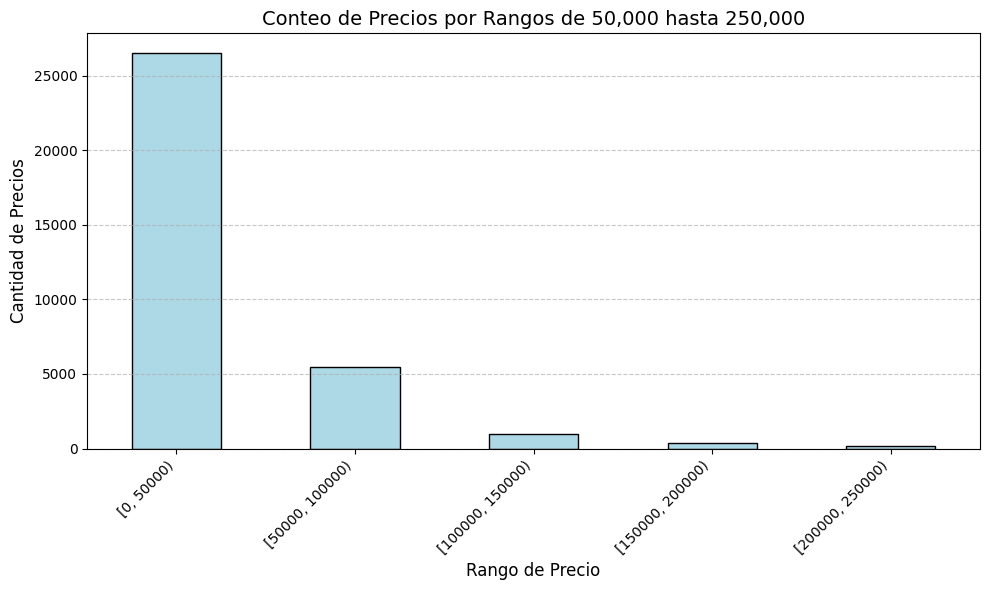

In [51]:
# Definir los rangos de 50,000 hasta 250,000
bins = range(0, 250001, 50000)

# Crear una nueva columna para los rangos de precio
df['price_range'] = pd.cut(df['price'], bins=bins, right=False)

# Contar cuántos valores hay en cada rango
price_counts = df['price_range'].value_counts().sort_index()

# Crear el gráfico de barras para los conteos de los rangos de precio
plt.figure(figsize=(10, 6))
price_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Configurar título y etiquetas
plt.title('Conteo de Precios por Rangos de 50,000 hasta 250,000', fontsize=14)
plt.xlabel('Rango de Precio', fontsize=12)
plt.ylabel('Cantidad de Precios', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas en el eje X para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [52]:
# Filtrar los datos para incluir solo valores de price menores o iguales a 150,000
filtered_data_2 = df[df['price'] <= 150000]

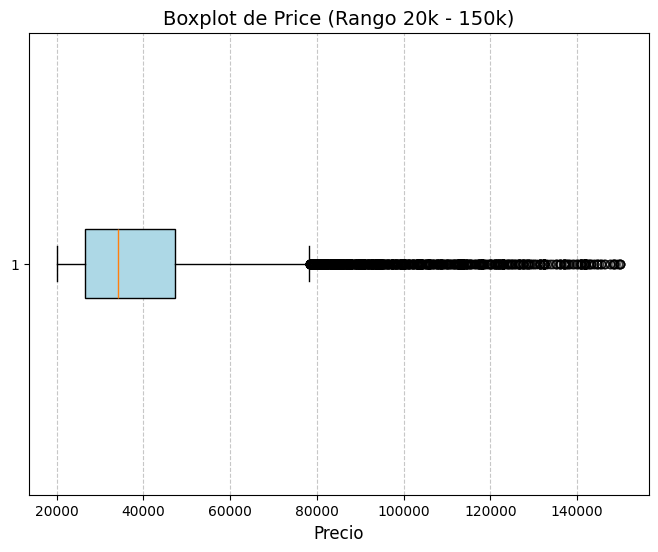

In [53]:
# Filtrar los datos para incluir solo valores de price entre 20,000 y 150,000
filtered_range_data2 = filtered_data_2[(filtered_data_2['price'] >= 20000) & (filtered_data_2['price'] <= 150000)]

# Crear el boxplot con los datos filtrados
plt.figure(figsize=(8, 6))
plt.boxplot(
    filtered_range_data2['price'].dropna(),
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor='lightblue'),
    flierprops=dict(marker='o', color='red', alpha=0.5)  # Cambiar el estilo de los outliers
)
plt.title('Boxplot de Price (Rango 20k - 150k)', fontsize=14)
plt.xlabel('Precio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-56-a98519099f75>:5: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


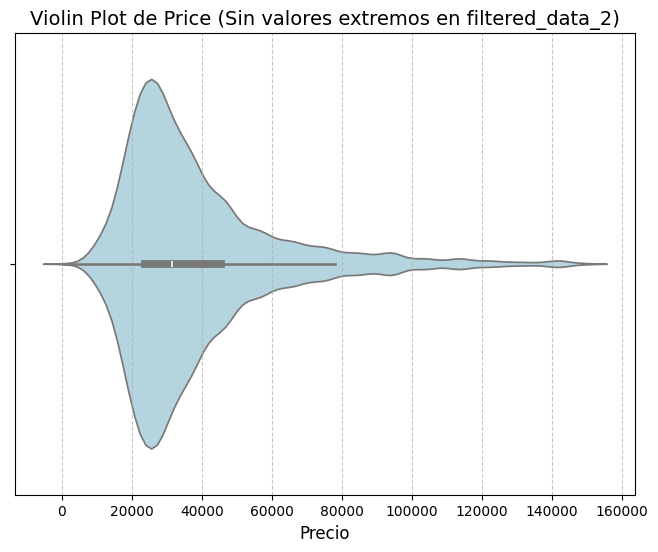

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.violinplot(
    x=filtered_data_2['price'], color="lightblue", inner="box", scale="width"
)
plt.title('Violin Plot de Price (Sin valores extremos en filtered_data_2)', fontsize=14)
plt.xlabel('Precio', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [57]:
#Tomamos la decisión de cortar en 150K debido a que como vamos a analizar CABA, sabemos que los precios de barrios como Puerto Madero pueden ser caros y no queremos limitar a valores menores que 150 para nos sesgar el analisis


# Guardar el nuevo DataFrame en un archivo CSV
filtered_data_2.to_csv('filtered_data_2.csv', index=False)

# Descargarlo en Google Colab
from google.colab import files
files.download('filtered_data_2.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>